In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.datasets import iris, ad_hoc_data
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 7]
%config InlineBackend.figure_format = 'retina'

seed = 12345
algorithm_globals.random_seed = seed

In [2]:
iris_dataset = False

In [3]:
if iris_dataset:
    
    print("Using iris dataset...")
    
    # iris dataset
    adhoc_dimension = 4

    train_features, train_labels, test_features, test_labels = iris(
        training_size=20,
        test_size=5,
        n=adhoc_dimension,
        plot_data=False,
        one_hot=False,
    )
    
    scaler_mm = MinMaxScaler()
    train_features = scaler_mm.fit_transform(train_features)
    train_features[:10]

    # not needed
    #ohe_transformer = OneHotEncoder(sparse = False)
    #train_labels = ohe_transformer.fit_transform(train_labels.reshape(-1,1))
    #train_labels[:10]

else:
    
    print("Using adhoc dataset...")
        
    # adhoc dataset
    adhoc_dimension = 2

    train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
        training_size=20,
        test_size=5,
        n=adhoc_dimension,
        gap=0.3,
        plot_data=False,
        one_hot=False,
        include_sample_total=True,
    )

Using adhoc dataset...


In [4]:
train_features.shape

(40, 2)

In [5]:
train_labels.shape

(40,)

In [6]:
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

adhoc_backend = QuantumInstance(
    Aer.get_backend("qasm_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed
)

adhoc_kernel = QuantumKernel(feature_map=adhoc_feature_map, quantum_instance=adhoc_backend)

In [8]:
qsvc = QSVC(quantum_kernel=adhoc_kernel)
qsvc.fit(train_features, train_labels)

qsvc_score = qsvc.score(test_features, test_labels)

In [9]:
qsvc_score

1.0

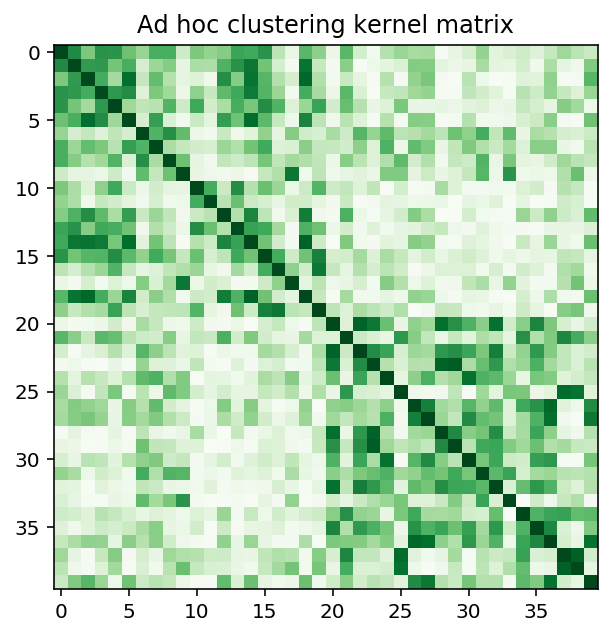

Clustering score: 0.5466306756208169


In [10]:
adhoc_matrix = adhoc_kernel.evaluate(x_vec=train_features)

plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(adhoc_matrix), interpolation="nearest", origin="upper", cmap="Greens")
plt.title("Ad hoc clustering kernel matrix")
plt.show()

adhoc_spectral = SpectralClustering(2, affinity="precomputed")
cluster_labels = adhoc_spectral.fit_predict(adhoc_matrix)
cluster_score = normalized_mutual_info_score(cluster_labels, train_labels)

print(f"Clustering score: {cluster_score}")

In [11]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

adhoc_backend = QuantumInstance(
    Aer.get_backend("qasm_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed
)

adhoc_kernel = QuantumKernel(feature_map=adhoc_feature_map, quantum_instance=adhoc_backend)

In [12]:
if iris_dataset:
    
    train_features, train_labels, test_features, test_labels = iris(
        training_size=25,
        test_size=5,
        n=adhoc_dimension,
        plot_data=False,
        one_hot=False,
    )
    
else:
    
    train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
        training_size=25,
        test_size=0,
        n=adhoc_dimension,
        gap=0.6,
        plot_data=False,
        one_hot=False,
        include_sample_total=True,
    )

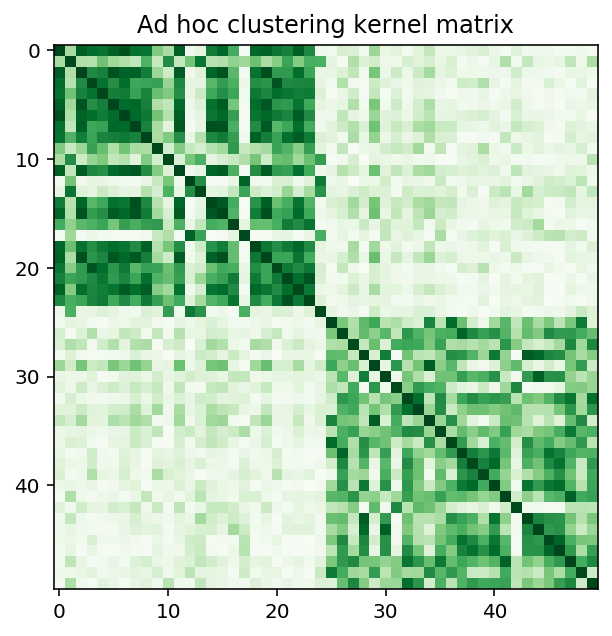

Clustering score: 0.7287008798015754


In [13]:
adhoc_matrix = adhoc_kernel.evaluate(x_vec=train_features)

plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(adhoc_matrix), interpolation="nearest", origin="upper", cmap="Greens")
plt.title("Ad hoc clustering kernel matrix")
plt.show()

adhoc_spectral = SpectralClustering(2, affinity="precomputed")
cluster_labels = adhoc_spectral.fit_predict(adhoc_matrix)
cluster_score = normalized_mutual_info_score(cluster_labels, train_labels)

print(f"Clustering score: {cluster_score}")